Advertising Sales Channel Prediction

Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [20]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [21]:
df=df.drop(["Unnamed: 0"], axis=1)

In [22]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#Here the target is to predict the total sales generated from all the sales channel.
Target variable is sales and Tv, radio and newspaper are independent features

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#All are the float values and no categorical data found in the dataframe

In [24]:
#checking for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#No null values found in the dataframe

Exploratory Data Analysis:

<AxesSubplot:xlabel='TV', ylabel='Density'>

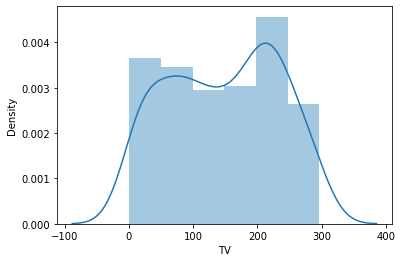

In [27]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

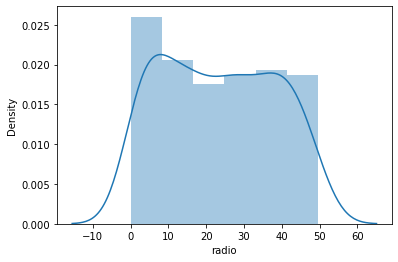

In [28]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

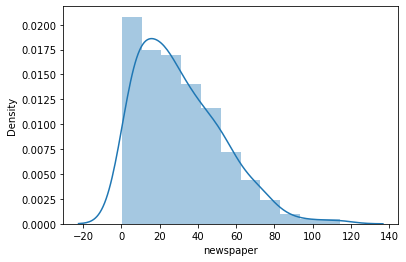

In [29]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

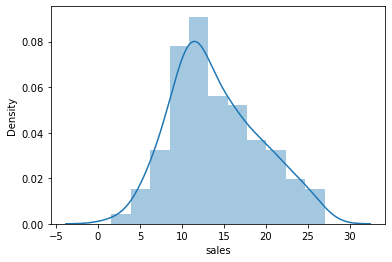

In [30]:
sns.distplot(df["sales"])

Bi-Variate analysis:

<AxesSubplot:xlabel='TV', ylabel='sales'>

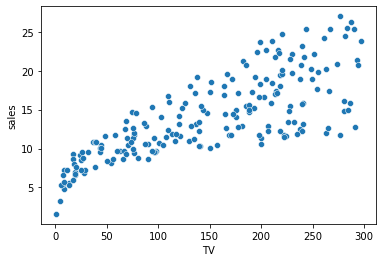

In [31]:
sns.scatterplot(x="TV", y="sales", data=df)

#As advertising on TV increases sales also increases

<AxesSubplot:xlabel='radio', ylabel='sales'>

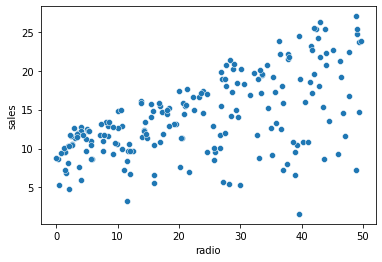

In [32]:
sns.scatterplot(x="radio", y="sales", data=df)

As the graph of advertisement on radio is notlinear with sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

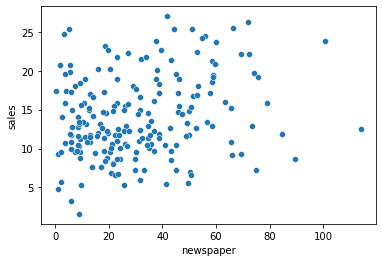

In [33]:
sns.scatterplot(x="newspaper", y="sales", data=df)

Statistical Analysis:

In [34]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [37]:
df.corr()["sales"].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

#newspaper is less co-related with sales and "TV" is highly corelated with sales

<AxesSubplot:>

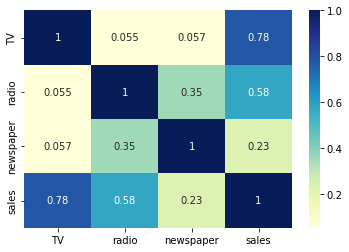

In [39]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

In [218]:
#Let’s split the data into the target and feature variables.

#Target_variable=Y
#Feature_Variable=X
Y=df["sales"]

In [186]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [219]:
X=df[["TV"]]

In [220]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


Regression algorithms are commonly used in machine learning to forecast sales volume

y=c+m1x1+m2x2+...+mnxn

#lets split the data into four variables, namely, X_train, Y_train, X_test, Y_test. for analysis

spllited 80% of data to training and 20% to testing

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state=3)

In [236]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [237]:
lr.intercept_

6.9542511962420175

In [238]:
lr.coef_

array([0.04729254])

In [239]:
#the linear regression model is
print("The LR model is: Y=", lr.intercept_, "+", lr.coef_, "TV")

The LR model is: Y= 6.9542511962420175 + [0.04729254] TV


In [240]:
lr.score(X_train,Y_train)

0.6265001617952246

In [241]:
lr.score(X_test,Y_test)

0.5443789831429582

In [242]:
Y_pred =lr.predict(X_test)

In [244]:
Y_pred

array([16.53099106, 11.70242247, 15.69864231, 15.32503123,  9.31887832,
       10.51537965, 20.55558643, 11.19639226, 16.37019642, 17.47211266,
       14.78589624, 10.18906111, 19.38746063,  8.82230663, 13.18267905,
       14.91831536, 14.67712339, 14.11907139, 15.32503123, 16.92351917,
       16.60665913, 11.90105115,  8.07981371,  9.67357239,  9.61209209,
       11.00722209, 17.37279832, 17.54778073, 20.97176081, 10.56267219,
       13.15430352, 18.29973215,  7.50757394, 11.48014752,  8.99255978,
       11.4092087 , 15.50474289,  8.22169134, 13.54210237, 13.58939492])

#Above is the Linear Regerssion output for test and train data

In [245]:
diff=pd.DataFrame({"Actual":Y_test, "predicted":Y_pred})

In [246]:
diff.head(10)

,Actual,predicted
40,16.6,16.530991
51,10.7,11.702422
139,20.7,15.698642
197,12.8,15.325031
170,8.4,9.318878
82,11.3,10.515380
183,26.2,20.555586
46,10.6,11.196392
70,18.3,16.370196
100,11.7,17.472113


In [249]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [250]:
R2=r2_score(Y_test,Y_pred)


In [251]:
print("Accuracy= ", R2.round(2)*100, '%')

Accuracy=  54.0 %


Accuravy of the linear regression on the dataset

<AxesSubplot:xlabel='sales'>

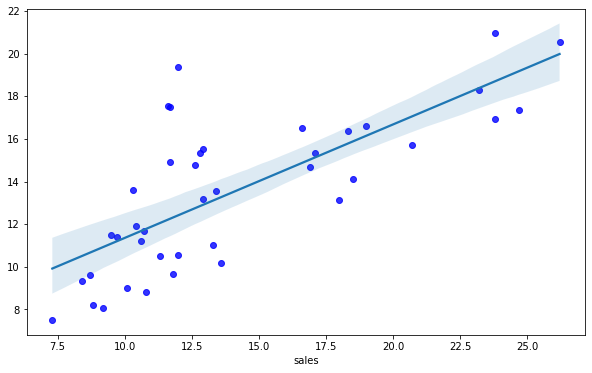

In [253]:
plt.figure(figsize=(10,6))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"color":"blue"})

The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the blue dots are on the line, thus we can say that model has produced the best fit line.

In [294]:
Z=df[["radio"]]

In [295]:
Z

,radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
...,...
195,3.7
196,4.9
197,9.3
198,42.0


In [296]:
Z_train, Z_test, Y_train, Y_test = train_test_split(Z,Y, train_size = 0.8, test_size = 0.2, random_state=3)

In [297]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Z_train, Y_train)

LinearRegression()

In [298]:
lr.intercept_

9.352723661010884

In [299]:
lr.coef_

array([0.20140497])

In [300]:
#the linear regression model is
print("The LR model is: Y=", lr.intercept_, "+", lr.coef_, "radio")

The LR model is: Y= 9.352723661010884 + [0.20140497] radio


In [301]:
lr.score(Z_train,Y_train)

0.3142592253320029

In [302]:
lr.score(Z_test,Y_test)

0.41010752250380766

In [303]:
Y_pred =lr.predict(Z_test)

In [304]:
Y_pred 

array([13.84405459, 11.28621141, 18.19440203, 11.22578992, 11.68902136,
       13.44124464, 18.01313755, 11.34663291, 15.51571587, 10.21876505,
       11.3667734 , 18.31524501, 10.05764107, 17.6304681 , 13.05857519,
       10.78269898, 15.71712085, 17.67074909, 16.0796498 , 19.34241038,
       15.97894731, 10.50073201, 16.42203825, 15.95880681, 10.50073201,
       16.56302174, 19.2215674 ,  9.8360956 , 16.66372422, 14.89136045,
       17.97285656, 17.71103009, 16.78456721,  9.63469062, 14.73023647,
       10.33960803, 11.52789738, 15.99908781, 12.27309579,  9.73539311])

In [305]:
diff2=pd.DataFrame({"Actual":Y_test, "predicted":Y_pred})

In [306]:
diff2

,Actual,predicted
40,16.6,13.844055
51,10.7,11.286211
139,20.7,18.194402
197,12.8,11.225790
170,8.4,11.689021
82,11.3,13.441245
183,26.2,18.013138
46,10.6,11.346633
70,18.3,15.515716
100,11.7,10.218765


In [276]:
R2=r2_score(Y_test,Y_pred)

In [277]:
print("Accuracy= ", R2.round(2)*100, '%')

Accuracy=  41.0 %


<AxesSubplot:xlabel='sales'>

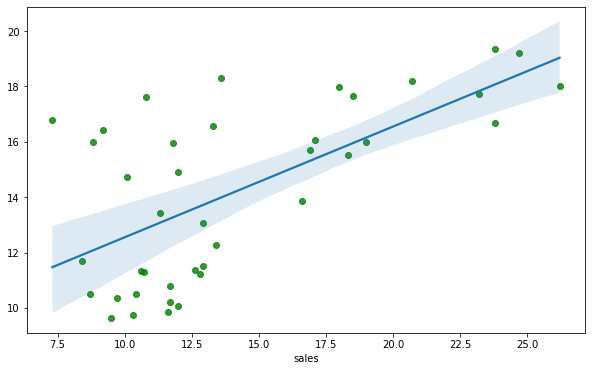

In [278]:
plt.figure(figsize=(10,6))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"color":"green"})

In [310]:
V=df[["newspaper"]]
V

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


In [311]:
V_train, V_test, Y_train, Y_test = train_test_split(V,Y, train_size = 0.8, test_size = 0.2, random_state=3)

In [312]:

lr.fit(V_train, Y_train)

LinearRegression()

In [313]:
lr.intercept_

12.469758870229684

In [314]:
lr.coef_

array([0.05006628])

In [315]:
#the linear regression model is
print("The LR model is: Y=", lr.intercept_, "+", lr.coef_, "newspaper")

The LR model is: Y= 12.469758870229684 + [0.05006628] newspaper


In [316]:
lr.score(V_train,Y_train)

0.043148200672048276

In [317]:
lr.score(V_test,Y_test)

0.08915320730817478

In [318]:
Y_pred =lr.predict(V_test)

In [319]:
Y_pred

array([14.0518532 , 12.64999746, 12.55487154, 12.79018304, 13.39097835,
       14.09691285, 16.06451751, 14.25712493, 14.40732376, 14.96305943,
       13.35092533, 14.25211831, 13.44605126, 12.76014327, 14.20205203,
       13.11060721, 15.11826489, 15.39863603, 14.40732376, 14.35725749,
       14.77280758, 14.19203877, 15.76912648, 13.64631636, 13.95672728,
       14.93802629, 12.62997095, 13.25079278, 17.52144615, 13.27081929,
       13.91667426, 13.39598498, 14.73275456, 12.84024931, 14.22708517,
       12.87529571, 15.39362941, 13.436038  , 12.98043489, 12.92035536])

In [320]:
diff3=pd.DataFrame({"Actual":Y_test, "predicted":Y_pred})

In [321]:
diff3

,Actual,predicted
40,16.6,14.051853
51,10.7,12.649997
139,20.7,12.554872
197,12.8,12.790183
170,8.4,13.390978
82,11.3,14.096913
183,26.2,16.064518
46,10.6,14.257125
70,18.3,14.407324
100,11.7,14.963059


In [322]:
R2=r2_score(Y_test,Y_pred)

In [323]:
print("Accuracy= ", R2.round(2)*100, '%')

Accuracy=  9.0 %


<AxesSubplot:xlabel='sales'>

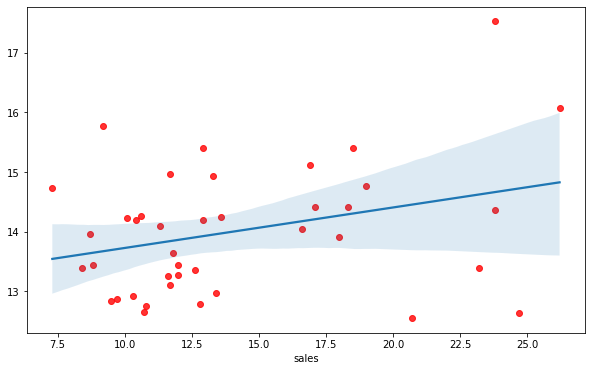

In [324]:
plt.figure(figsize=(10,6))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"color":"red"})

#By obesrving all the above predict that TV advertising is the best for sales prediction.